Tests for Annotation module
---

In [1]:
import wsitk_annot as ann
import pandas as pd
import numpy as np
import shapely.geometry as shg

from wsitk_annot import Annotation

In [2]:
a_dot = ann.createEmptyAnnotationObject('DOT')
a_pset = ann.createEmptyAnnotationObject('POINTSET')
a_pline = ann.createEmptyAnnotationObject('POLYLINE')
a_poly = ann.createEmptyAnnotationObject('POLYGON')
a_circ = ann.createEmptyAnnotationObject('CIRCLE')

In [3]:
a_dot.asdict()

{'annotation_type': 'DOT',
 'name': 'DOT',
 'x': array([0.]),
 'y': array([0.]),
 'metadata': {'group': ['no_group']},
 'data': []}

In [4]:
a_pset.x

array([0.])

In [5]:
o = ann.Dot((10, 20.5), "another_dot", ['some group'])
print(o.asdict())
o.fromdict(a_dot.asdict())
print(o.asdict())

{'annotation_type': 'DOT', 'name': 'another_dot', 'x': array([10.]), 'y': array([20.5]), 'metadata': {'group': ['some group']}, 'data': []}
{'annotation_type': 'DOT', 'name': 'DOT', 'x': array([0.]), 'y': array([0.]), 'metadata': {'group': ['no_group']}, 'data': []}


In [6]:
o = ann.Polygon([[0, 1.5], [2.5, 3.0], [4, 6], [0, 1.5]], "poly")
print(o.asdict())
print(o.asGeoJSON())
o.fromdict(a_poly.asdict())
print(o.asdict())

{'annotation_type': 'POLYGON', 'name': 'poly', 'x': array([0. , 2.5, 4. , 0. ]), 'y': array([1.5, 3. , 6. , 1.5]), 'metadata': {'group': ['no_group']}, 'data': []}
{"geometry": {"coordinates": [[[0.0, 1.5], [2.5, 3.0], [4.0, 6.0], [0.0, 1.5]]], "type": "Polygon"}, "properties": {"annotation_type": "POLYGON", "data": [], "metadata": {"group": ["no_group"]}, "name": "poly", "object_type": "annotation"}, "type": "Feature"}
{'annotation_type': 'POLYGON', 'name': None, 'x': array([0., 1., 2., 0.]), 'y': array([0., 1., 2., 0.]), 'metadata': {'group': ['no_group']}, 'data': []}


In [7]:
o = ann.Circle([0,1], 2,
               data=pd.DataFrame({
                   'gene': ['g1', 'g2'],
                   'expr': [1, 2.0]
               }))
print(o.asdict())

{'annotation_type': 'CIRCLE', 'name': None, 'x': array([ 0.00000000e+00,  1.41421356e+00,  2.00000000e+00,  1.41421356e+00,
        2.44929360e-16, -1.41421356e+00, -2.00000000e+00, -1.41421356e+00,
        0.00000000e+00]), 'y': array([ 3.        ,  2.41421356,  1.        , -0.41421356, -1.        ,
       -0.41421356,  1.        ,  2.41421356,  3.        ]), 'metadata': {'group': ['no_group']}, 'data': {'gene': {0: 'g1', 1: 'g2'}, 'expr': {0: 1.0, 1: 2.0}}, 'radius': 2, 'center': [0, 1]}


In [8]:
a_pset.asdict()

{'annotation_type': 'POINTSET',
 'name': 'POINTS',
 'x': array([0.]),
 'y': array([0.]),
 'metadata': {'group': ['no_group']},
 'data': []}

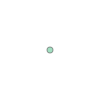

In [9]:
d = a_pset.asdict()
shg.MultiPoint([p for p in zip(a_pset.x, a_pset.y)])

In [10]:
b_pset = ann.createEmptyAnnotationObject('POINTSET')
b_pset.fromdict(a_pset.asdict())

In [11]:
b_pset.asdict()

{'annotation_type': 'POINTSET',
 'name': 'POINTS',
 'x': array([0.]),
 'y': array([0.]),
 'metadata': {'group': ['no_group']},
 'data': []}

In [12]:
A = ann.Annotation('wsi annot', {'width': 10, 'height': 15}, 0.25)

In [13]:
A.add_annotation_object(a_dot)

In [14]:
A.add_annotations([a_pset, a_poly, a_circ], layer='some layer')

In [15]:
A.asdict()

{'name': 'wsi annot',
 'image_shape': {'width': 10, 'height': 15},
 'mpp': 0.25,
 'annotations': {'base': [{'annotation_type': 'DOT',
    'name': 'DOT',
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POINT (0 0)'}],
  'some layer': [{'annotation_type': 'POINTSET',
    'name': 'POINTS',
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'MULTIPOINT (0 0)'},
   {'annotation_type': 'POLYGON',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POLYGON ((0 0, 1 1, 2 2, 0 0))'},
   {'annotation_type': 'CIRCLE',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POLYGON ((0 1, 0.707107 0.707107, 1 0, 0.707107 -0.707107, 0 -1, -0.707107 -0.707107, -1 0, -0.707107 0.707107, 0 1))',
    'radius': 1.0,
    'center': [0.0, 0.0]}]}}

In [16]:
A.add_annotation_object(o, layer='another layer')

In [17]:
A.asdict()

{'name': 'wsi annot',
 'image_shape': {'width': 10, 'height': 15},
 'mpp': 0.25,
 'annotations': {'base': [{'annotation_type': 'DOT',
    'name': 'DOT',
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POINT (0 0)'}],
  'some layer': [{'annotation_type': 'POINTSET',
    'name': 'POINTS',
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'MULTIPOINT (0 0)'},
   {'annotation_type': 'POLYGON',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POLYGON ((0 0, 1 1, 2 2, 0 0))'},
   {'annotation_type': 'CIRCLE',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POLYGON ((0 1, 0.707107 0.707107, 1 0, 0.707107 -0.707107, 0 -1, -0.707107 -0.707107, -1 0, -0.707107 0.707107, 0 1))',
    'radius': 1.0,
    'center': [0.0, 0.0]}],
  'another layer': [{'annotation_type': 'CIRCLE',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': {'gene': {0: 'g1', 1: 'g2'}, 'expr'

In [1]:
import orjson as json
from pathlib import Path

ModuleNotFoundError: No module named 'orjson'

In [ ]:
with TinyDB(Path("./test_01_annot.db"), access_mode="r+", storage=BetterJSONStorage) as db:
    db.insert(A.asdict())

Exception ignored in thread started by: <bound method BetterJSONStorage.__file_writer of BetterJSONStorage(path=test_01_annot.db, Paths={503618452809473693})>
Traceback (most recent call last):
  File "/home/vlad/Projects/wsitk-annot/.venv/lib/python3.12/site-packages/BetterJSONStorage/BetterJSONStorage.py", line 162, in __file_writer
    self._handle.write(compress(dumps(self._data, **self._dump_kwargs)))
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Dict key must be str


In [18]:
A.save("./test_01_annot.bin")

UnsupportedTypeException: unsupported type: <class 'numpy.ndarray'>

In [18]:
B = ann.Annotation('', {'width': 0, 'height': 0}, 0.)

In [19]:
B.load("./test_01_annot.bin")

In [20]:
B.asdict()

{'name': 'wsi annot',
 'image_shape': {'width': 10, 'height': 15},
 'mpp': 0.25,
 'annotations': {'another layer': [{'annotation_type': 'CIRCLE',
    'name': None,
    'x': array([ 0.00000000e+00,  1.41421356e+00,  2.00000000e+00,  1.41421356e+00,
            2.44929360e-16, -1.41421356e+00, -2.00000000e+00, -1.41421356e+00,
            0.00000000e+00]),
    'y': array([ 3.        ,  2.41421356,  1.        , -0.41421356, -1.        ,
           -0.41421356,  1.        ,  2.41421356,  3.        ]),
    'metadata': {'group': ['no_group']},
    'data': {'gene': {0: 'g1', 1: 'g2'}, 'expr': {0: 1.0, 1: 2.0}}}],
  'some layer': [{'annotation_type': 'POINTSET',
    'name': 'POINTS',
    'x': array([0.]),
    'y': array([0.]),
    'metadata': {'group': ['no_group']},
    'data': []},
   {'annotation_type': 'POLYGON',
    'name': None,
    'x': array([0., 1., 2., 0.]),
    'y': array([0., 1., 2., 0.]),
    'metadata': {'group': ['no_group']},
    'data': []},
   {'annotation_type': 'CIRCLE',
  